## Grid Search Hyperparameter optimization

Here we use the very common method of using a grid to search for the optimal parameters in our Machine learning algorithm. We are using the Pima Indian diabetes dataset from Kaggle and KNN. Follow along with the preprocessing steps in the exercise.

Load the necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# set random seed to try make this exercise and solutions reproducible (NB: this is just for teaching purpose and not something you would do in real life)
random_seed_number = 42
np.random.seed(random_seed_number)

C:\Users\andre\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Load the diabetes data

In [2]:
diabetes_data = pd.read_csv('data/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**<font color='teal'> Start by reviewing the data info.</font>**

In [3]:
diabetes_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**<font color='teal'> Apply the describe function to the data.</font>**

In [4]:
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


**<font color='teal'> Currently, the missing values in the dataset are represented as zeros. Replace the zero values in the following columns ['Glucose','BloodPressure','SkinThickness','Insulin','BMI'] with nan .</font>**

In [5]:
diabetes_data = diabetes_data.copy(deep=True)
diabetes_data[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,NaN,33.6
1,85.0,66.0,29.0,NaN,26.6
2,183.0,64.0,NaN,NaN,23.3
3,89.0,66.0,23.0,94.0,28.1
4,137.0,40.0,35.0,168.0,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.0,32.9
764,122.0,70.0,27.0,NaN,36.8
765,121.0,72.0,23.0,112.0,26.2
766,126.0,60.0,NaN,NaN,30.1


**<font color='teal'> Plot histograms of each column. </font>**

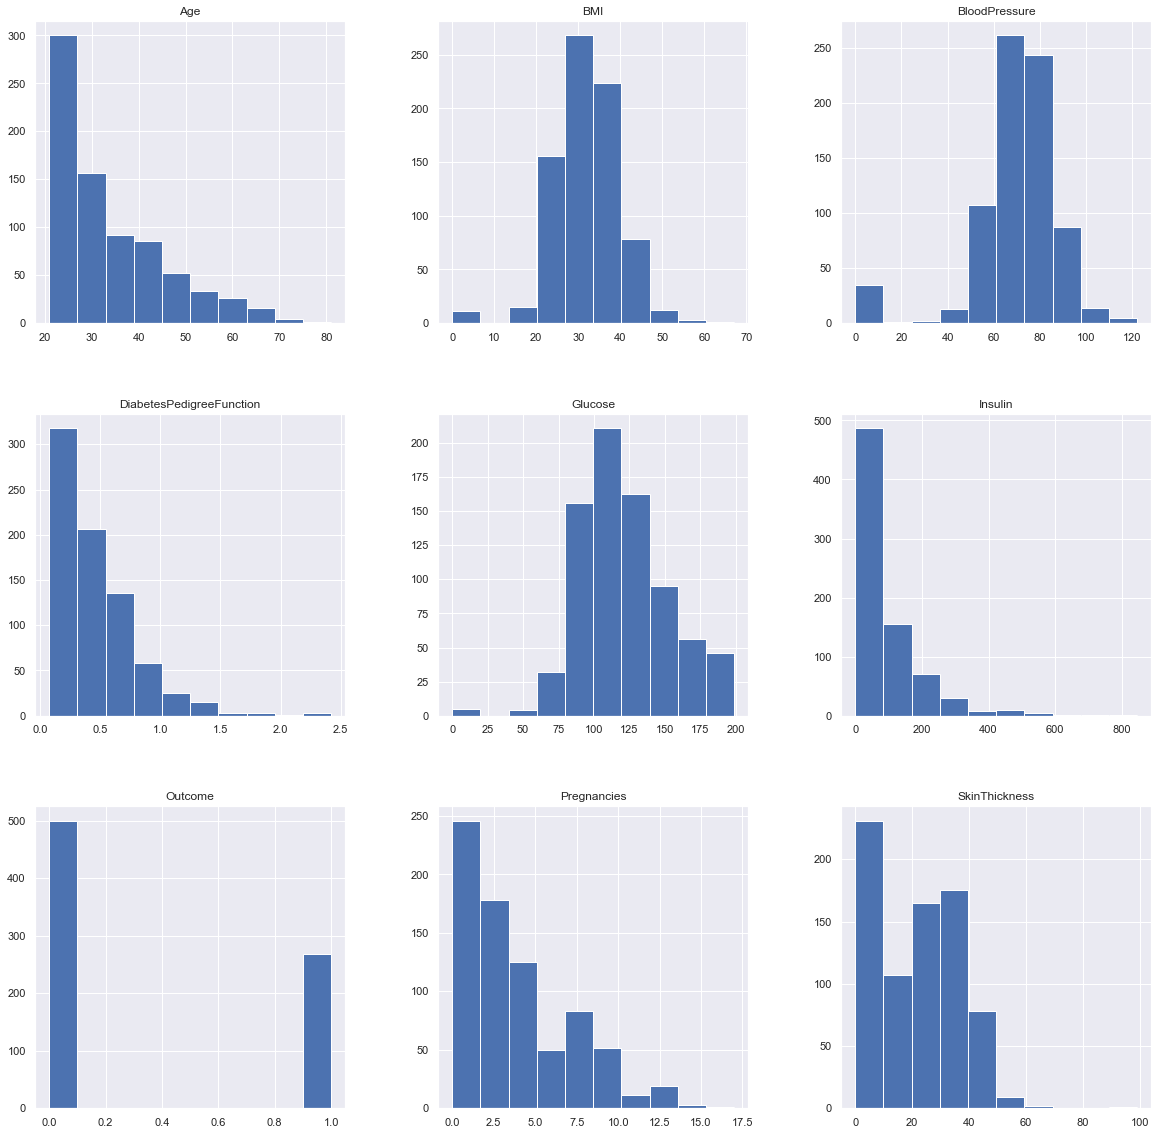

In [6]:
p = diabetes_data.hist(figsize = (20,20))

#### Replace the zeros with mean and median values.

In [7]:
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace = True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace = True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace = True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace = True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace = True)

**<font color='teal'> Plot histograms of each column after replacing nan. </font>**

Plotting after removing the NAN


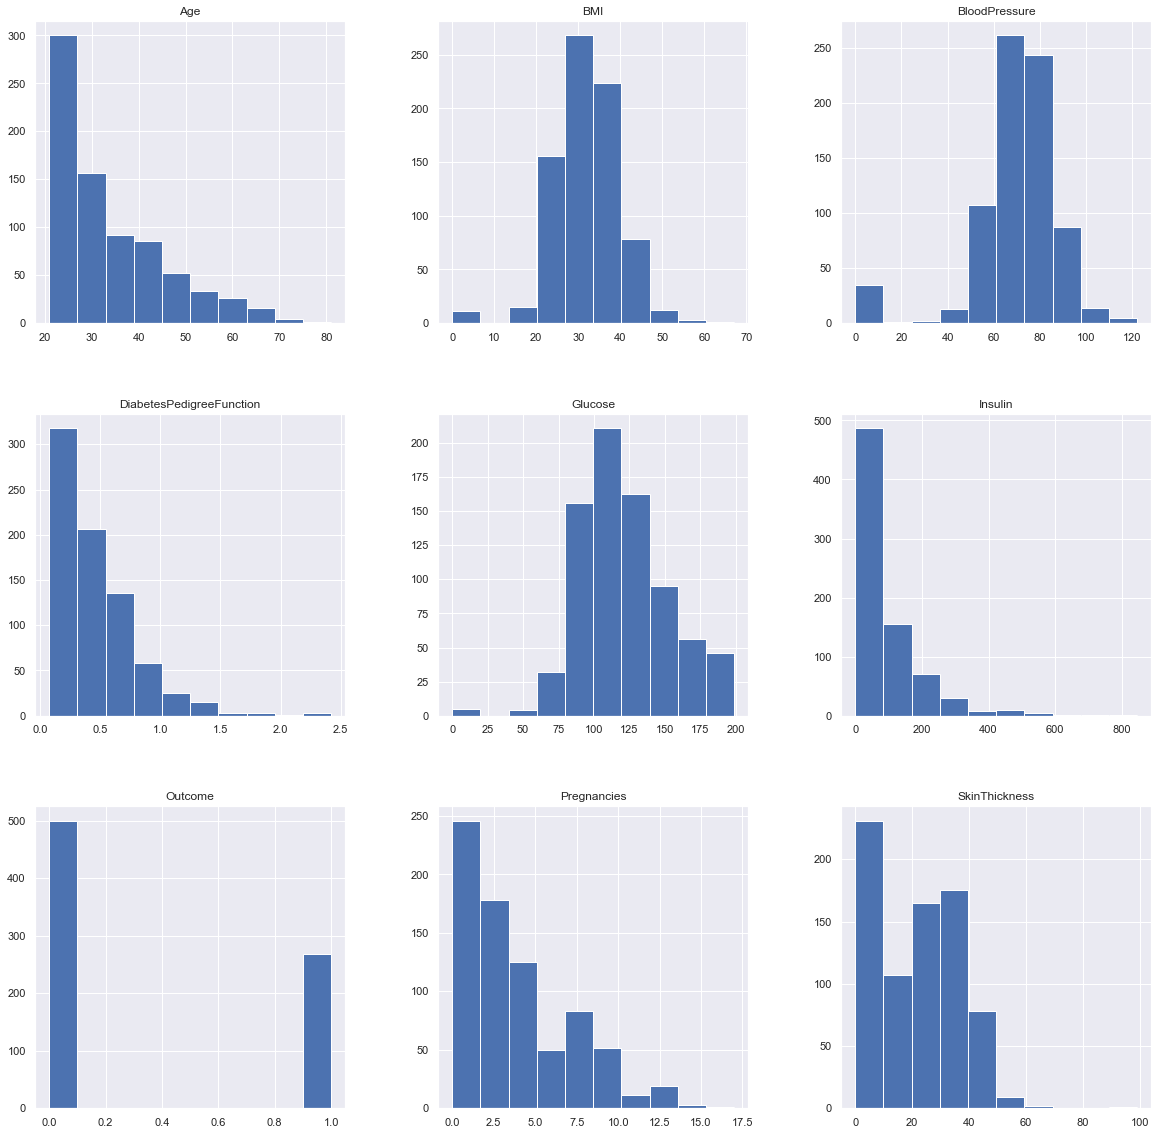

In [8]:
print('Plotting after removing the NAN')
p = diabetes_data.hist(figsize = (20,20))

#### Plot the correlation matrix heatmap

Correlation between various features


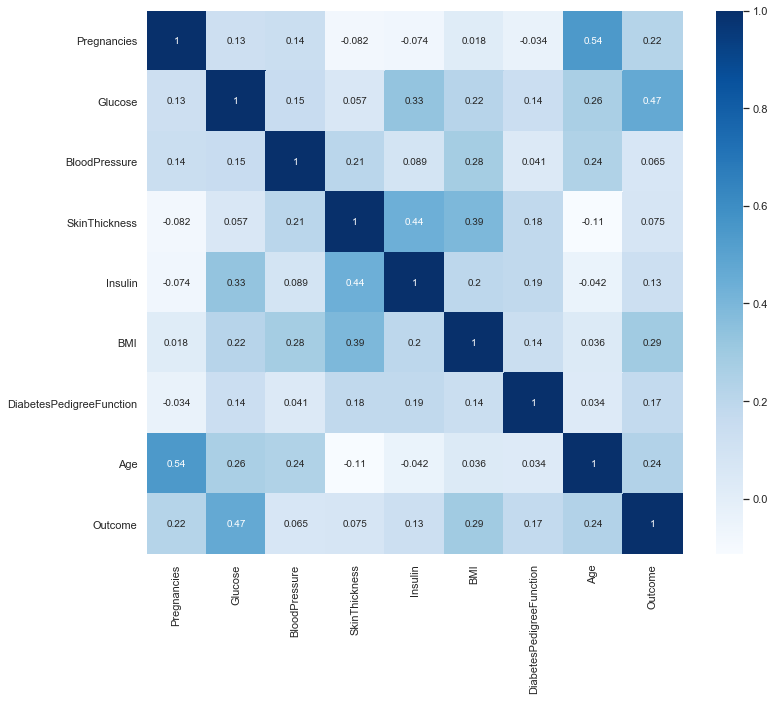

In [9]:
plt.figure(figsize=(12,10))
print('Correlation between various features')
p=sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')

**<font color='teal'> Define the `y` variable as the `Outcome` column</font>**

In [10]:
y = diabetes_data.Outcome

**<font color='teal'> Create a 70/30 train and test split. </font>**

In [11]:
from sklearn.model_selection import train_test_split

X = diabetes_data.drop("Outcome",axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=random_seed_number,stratify=y)

**<font color='teal'> Using Sklearn standarize the magnitude of the features by scaling the values. </font>**

In [12]:
from sklearn.preprocessing import StandardScaler

# fit scaler on X_train
sc_X = StandardScaler()
sc_X = sc_X.fit(X_train)

# use scaler to transform X_train
X_train = pd.DataFrame(
    sc_X.transform(X_train), 
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
)

# use scaler to transform X_test
X_test = pd.DataFrame(
    sc_X.transform(X_test), 
    columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
)

print(X_train.head())
print(X_test.head())

   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.931383  2.017945       0.780670       0.812564 -0.722392  0.431483   
1     0.632606 -1.148619       0.465388      -1.316902 -0.722392 -0.119832   
2    -0.562502 -0.476923      -0.270269       0.941623  0.373154 -0.209581   
3    -0.562502 -0.668836      -0.795739       0.489918  0.244266  0.726372   
4     0.333829 -0.540894       0.255200      -1.316902 -0.722392 -0.427543   

   DiabetesPedigreeFunction       Age  
0                 -0.374779  0.632129  
1                 -0.294168  0.716992  
2                  2.745172  0.038086  
3                  0.052162 -0.810548  
4                 -0.977870  1.226172  
   Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0    -0.263725  0.290729       0.465388       0.167271  0.004903 -0.478828   
1     0.035052 -0.380967      -0.270269       1.522386  0.189029  0.341734   
2     2.126492  0.706540       1.306139       0.812564  0

#### Using a range of neighbor values of 1-10 apply the KNearestNeighbor classifier to classify the the data.

In [13]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,10):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

**<font color='teal'> Print the train and test scores for each iteration </font>**

In [14]:
print(train_scores)
print(test_scores)

[1.0, 0.8379888268156425, 0.8472998137802608, 0.8044692737430168, 0.8081936685288641, 0.7970204841713222, 0.8081936685288641, 0.7970204841713222, 0.7951582867783985]
[0.7316017316017316, 0.7142857142857143, 0.7012987012987013, 0.7186147186147186, 0.7142857142857143, 0.7359307359307359, 0.7489177489177489, 0.7445887445887446, 0.7575757575757576]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the training data set. </font>**

In [15]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


**<font color='teal'> Identify the number of neighbors that resulted in the max score in the testing data set. </font>**

In [16]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 75.75757575757575 % and k = [9]


Plot the train and test model performance by number of neighbors.

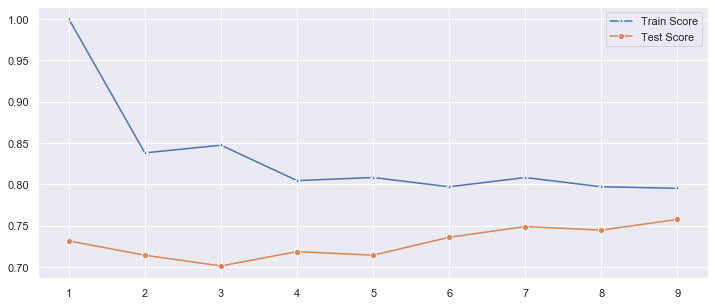

In [17]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,10),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,10),test_scores,marker='o',label='Test Score')

**<font color='teal'> Fit and score the best number of neighbors based on the plot. </font>**

In [18]:
knn = KNeighborsClassifier(7)
knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.7489177489177489

In [19]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)

**<font color='teal'> Plot the confusion matrix for the model fit above. </font>**

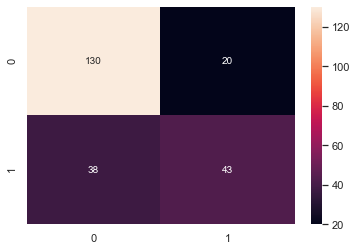

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
pl = confusion_matrix(y_test,y_pred)
sns.heatmap(pl, annot=True, fmt='g')

**<font color='teal'> Print the classification report </font>**

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.53      0.60        81

    accuracy                           0.75       231
   macro avg       0.73      0.70      0.71       231
weighted avg       0.74      0.75      0.74       231



#### In the case of the K nearest neighbors algorithm the K parameter is one of the most important parameters affecting the model performance.  The model performance isn't horrible but what if we didn't consider a wide enough range of values in our neighbors for the KNN. An alternative to fitting a loop of models is to use a grid search to identify the proper number. It is common practice to use a grid search method for all adjustable parameters in any type of machine learning algorithm. First you define the grid, aka the range of values to test in the parameter being optimized, and then compare the model outcome performance based on the different values in the grid.

#### Run the code in the next cell to see how to implement the grid search method for identifying the best parameter value for the n_neighbors parameter. Notice the param_grid is the range values to test and we apply cross validation with 5 folds to score each possible value of n_neighbors.

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

#### Print the best score and best parameter for n_neighbors.

In [23]:
print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7578558696205755
Best Parameters: {'n_neighbors': 14}


Here you can see that the ideal number of n_neighbors for this model is 14 based on the grid search performed. 

**<font color='teal'> Now followoing the KNN example apply this grid search method to find the optimal number of estimators in a Randon Forest model.
</font>**

In [24]:
from sklearn.ensemble import RandomForestClassifier
import time

time_start = time.time()

rfc_params  = {
    'n_estimators':[100,250],
    'max_features':['auto', 'sqrt', 'log2'],
    'max_depth':[4, 6,7, 8, None],
    'min_samples_split':[2,8,10]
}
rfc_grid = GridSearchCV(RandomForestClassifier(random_state=random_seed_number), param_grid=rfc_params, cv=5, scoring = 'accuracy',n_jobs=-1)
rfc_grid.fit(X, y)
time_end_grid_search = time.time()
elapsed_time = round(time_end_grid_search - time_start, 2)
print(rfc_grid.best_score_)
print(rfc_grid.best_params_)
print('Time for parameter optimization '+str(elapsed_time))

0.7761225702402172
{'max_depth': 8, 'max_features': 'log2', 'min_samples_split': 10, 'n_estimators': 100}
Time for parameter optimization 20.91
